In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest

import seaborn as sns

from scipy.stats import norm
from scipy import stats

%matplotlib inline

import matplotlib 
import matplotlib.pyplot as plt



Using TensorFlow backend.


Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)


C:\Users\trongduong\Anaconda3\envs\tensorflow-gpu\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\trongduong\Anaconda3\envs\tensorflow-gpu\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


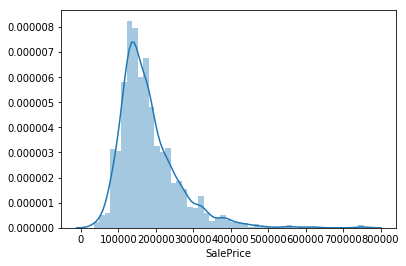

In [2]:

data = pd.read_csv("train.csv")
train = data

print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = pd.read_csv('test.csv')
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

sns.distplot(train['SalePrice']);

In [3]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

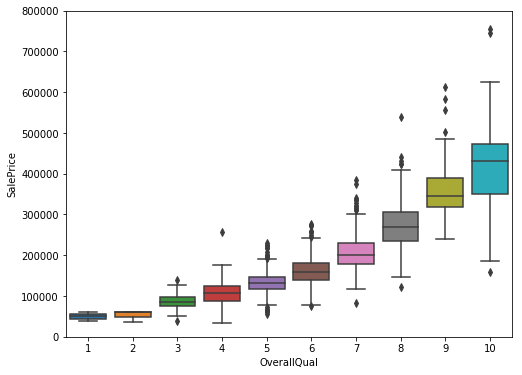

In [4]:

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


In [5]:
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])


Number of Outliers: 146
Number of rows without outliers: 1314


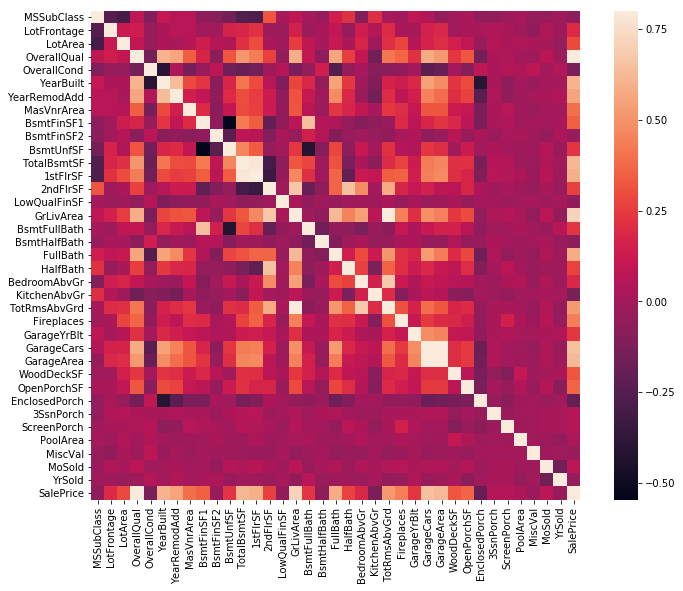

In [6]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square = True)


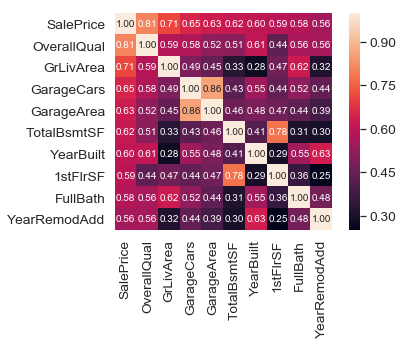

In [7]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [8]:
col_train = list(train.columns)
col_train_bis = list(train.columns)
label = 'SalePrice'

col_train_bis.remove('SalePrice')

train[col_train_bis].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [9]:
train.to_csv('out.csv', sep=',')


In [10]:
def init_model():
    
	# create model
	model = Sequential()
	model.add(Dense(36, input_dim=36, kernel_initializer='normal', activation='relu'))
    
	model.add(Dense(12, kernel_initializer='normal', activation='sigmoid'))
    
	model.add(Dense(6, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='normal'))

    # Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [11]:
seed = 10
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=init_model, epochs=200, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

In [12]:
train[label] = np.log(train[label])

In [13]:
x = train[label]
print(x[0])

12.247694320220994


In [14]:
pipeline.fit(train[col_train_bis], train[label])

Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021135CC5160>)])

In [22]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, train[col_train_bis], train[label], cv=kfold,scoring='neg_mean_squared_error', n_jobs=1)
print("Standardized: %.10f (%.10f) MSE" % (results.mean(), results.std()))

Standardized: -0.0276416322 (0.0047829276) MSE


In [18]:
pred = pipeline.predict(test[col_train_bis])

In [19]:
x = train[label]
print('%f %f \n',(x[1]), (pred[1]))
print('%f %f',np.exp(x[0]), np.exp(pred[0]))


%f %f 
 12.109010932687042 12.048109
%f %f 208500.00000000012 98236.625


array([11.779876 , 12.320683 , 12.1975155, ..., 12.245853 , 11.597329 ,
       12.309423 ], dtype=float32)

In [21]:
pred2 = np.exp(pred)
pred2 = pred2.astype(int)

print(pred2)
pred2 = pd.DataFrame((pred2))
pred2.to_csv('sol.csv', header=['SalePrice'])


[ 98236 170776 192761 ... 171614 127788 227467]
